In [1]:
import blackjackSim as bjs
import ipywidgets as widgets
from IPython.display import display, clear_output

In [2]:
hitbutton = widgets.Button(description = "Hit",
                          disabled = False, 
                          button_style = '',
                          tooltip = "Hit",
                          icon = "hand-fist")

def hbc(b):
    clear_output()
    display(hitbutton)
    display(staybutton)
    game.hit()
    
hitbutton.on_click(hbc)

staybutton = widgets.Button(description = "Stand",
                          disabled = False, 
                          button_style = '',
                          tooltip = "Stand",
                          icon = "hand")

def sbc(b):
    clear_output()
    display(hitbutton)
    display(staybutton)
    game.stay()
    
staybutton.on_click(sbc)

Button(description='Hit', icon='hand-fist', style=ButtonStyle(), tooltip='Hit')

Button(description='Stand', icon='hand', style=ButtonStyle(), tooltip='Stand')

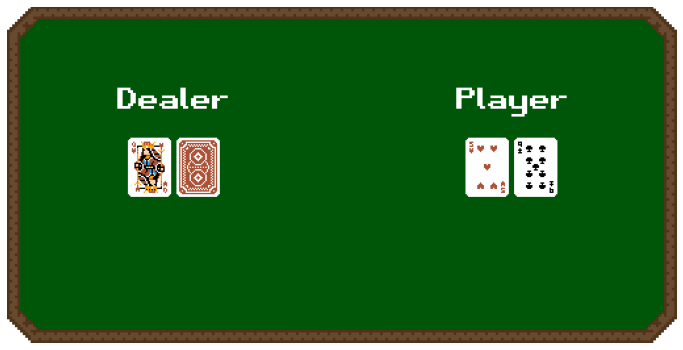

In [91]:
game = bjs.Blackjack(draw = True)

display(hitbutton)
display(staybutton)

In [4]:
game.aces()

0

In [86]:
import random

def sim_winrate(threshold):
    hit_threshold = threshold

    n_wins = 0
    iterations = 30000
    win = []
    aces = []
    points = []
    dealer_card = []

    hit = []
    round_ = []
    game_number = []

    current_game = 1
    instant_gameovers = 0
    for i in range(iterations):
        game = bjs.Blackjack()
        current_round = 0
        if game.is_active == False:
            instant_gameovers += 1
            current_game += 1
            continue
        else:
            while game.is_active == True:
                if game.point() < 11:
                    game.hit()
                    hit.append(1)
                    current_round += 1
                elif random.random() > hit_threshold:
                    game.hit()
                    hit.append(1)
                    current_round += 1
                else:
                    game.stay()
                    hit.append(0)
                    current_round += 1

                points.append(game.point())
                dealer_card.append(game.dealer[0])
                aces.append(game.aces())
                round_.append(current_round)

            for j in range(current_round): #assigning win and game labels to all turns
                game_number.append(current_game)
                win.append(game.player_win)
            
            if game.player_win == True:
                n_wins += 1
            
            current_game += 1
    
    return n_wins/iterations


In [95]:
thresholds = []
winrates = []
for i in [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.95, 0.99]:
    winrate = sim_winrate(i)
    print(f"Threshold: {i}, Winrate: {winrate}")
    thresholds.append(i)
    winrates.append(winrate)

Threshold: 0.1, Winrate: 0.0235
Threshold: 0.2, Winrate: 0.0413
Threshold: 0.3, Winrate: 0.0601
Threshold: 0.4, Winrate: 0.07043333333333333
Threshold: 0.5, Winrate: 0.07863333333333333
Threshold: 0.6, Winrate: 0.08363333333333334
Threshold: 0.7, Winrate: 0.08463333333333334
Threshold: 0.8, Winrate: 0.0893
Threshold: 0.9, Winrate: 0.08966666666666667
Threshold: 0.95, Winrate: 0.09333333333333334
Threshold: 0.99, Winrate: 0.0887


Text(0.5, 0, 'Rate of staying')

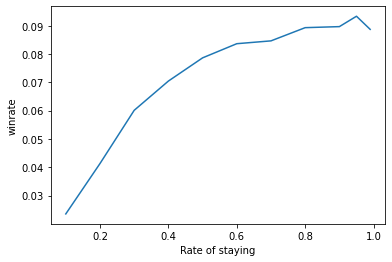

In [96]:
plt.plot(thresholds, winrates)
plt.ylabel("winrate")
plt.xlabel("Rate of staying")

In [81]:
win_ary = np.array(win_colors)
len(win_ary[win_ary == 1])

13564

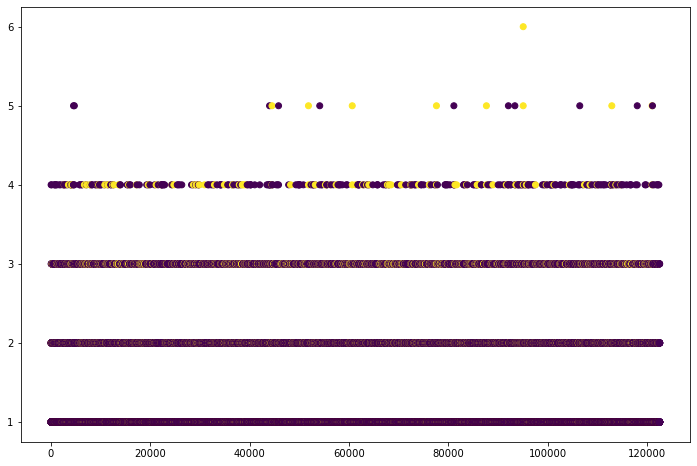

In [74]:
import matplotlib.pyplot as plt
import numpy as np

win_colors = []
for i in win:
    win_colors.append(int(i))
win_colors

plt.figure(figsize = (12,8))
plt.scatter(np.arange(len(round_)), round_, c = win_colors)

In [63]:
label = []
for i in range(len(win)):
    if win[i] == 0:
        if hit[i] == 0:
            label.append(1) #should've hit
        elif hit[i] == 1:
            label.append(0) #should've stayed
    elif win[i] == 1:
        label.append(hit[i]) #did the right thing, so just add that

In [64]:
import pandas as pd
data = pd.DataFrame()
data["label"] = label
data["points"] = points
data["aces"] = aces
data["dealer card"] = dealer_card
data["round"] = round_
data["game number"] = game_number

In [65]:
data

,label,points,aces,dealer card,round,game number
0,1,12,0,"(Diamonds, 6)",1,1
1,0,12,0,"(Diamonds, 2)",1,2
2,1,12,0,"(Diamonds, 2)",2,2
3,1,15,0,"(Spades, 10)",1,3
4,1,18,1,"(Clubs, 9)",1,4
...,...,...,...,...,...,...
129,1,20,0,"(Diamonds, King)",1,96
130,1,15,0,"(Diamonds, 8)",1,97
131,1,12,0,"(Spades, 9)",1,99
132,0,19,0,"(Spades, 2)",1,100


[1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1]